<a href="https://colab.research.google.com/github/iraidaantropova/ADD/blob/main/ADD_HW7_SinitsaI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Урок 7. Классификация с помощью KNN. Кластеризация K-means

Домашнее задание:

Используя файл Lesson_7_extended.ipynb (он в web7.zip в материалах):

К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.

*Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [3]:
# Разделяю выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120, 2), (30, 2))

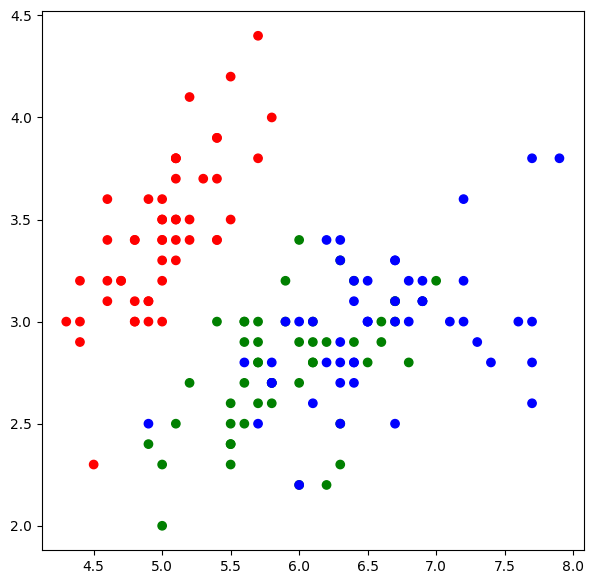

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [5]:
# Использую евклидову метрику, реализую функцию для ее подсчета.

def e_metrics(x1, x2):
    
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

In [7]:
def w_coeff_1(q, d):

    return q ** d

In [8]:
def w_coeff_2(q, d):

    return 1 / (d + q)**(1 + q)  

In [9]:
#Реализую алгоритм поиска k ближайших соседей.

def knn(x_train, y_train, x_test, k, q = 1, wv=1):

    # print(k, q, wv)

    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            weight = 1
            # Расчет весового коэффициента, в случае задания варианта расчета.
            if wv == 1:
                weight = w_coeff_1(q, len(test_distances)+1) # w(i) = q^i
            elif wv == 2:
                weight = w_coeff_1(q, distance) # w(i) = q^d
            elif wv == 3:
                weight = w_coeff_2(q, distance)  # w(i) = 1 / (d+a)^b
            elif wv == 4:
                weight = w_coeff_2(q, len(test_distances)+1)  # w(i) = 1 / i

            # Записываю в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((weight*distance, y_train[i])) 
            # test_distances.append((distance, y_train[i])) 

        # создаю словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортирую список и среди первых k элементов подсчитаю частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1

        # Записываю в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [15]:
#Функция для вычисления точности

def accuracy(pred, y):
    return (sum(pred == y) / len(y))

# Проверяю работу алгоритма при различных k
    
k = 2
q = 0.5

y_pred = knn(X_train, y_train, X_test, k, q, 0)

print(y_test)
print(y_pred)

print(f'Точность алгоритма при k = {k}, q = {q} : {accuracy(y_pred, y_test):.3f}')

[2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 2 0 0 1 1]
[2, 0, 1, 0, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2, 1, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 0, 0, 2, 2]
Точность алгоритма при k = 2, q = 0.5 : 0.733


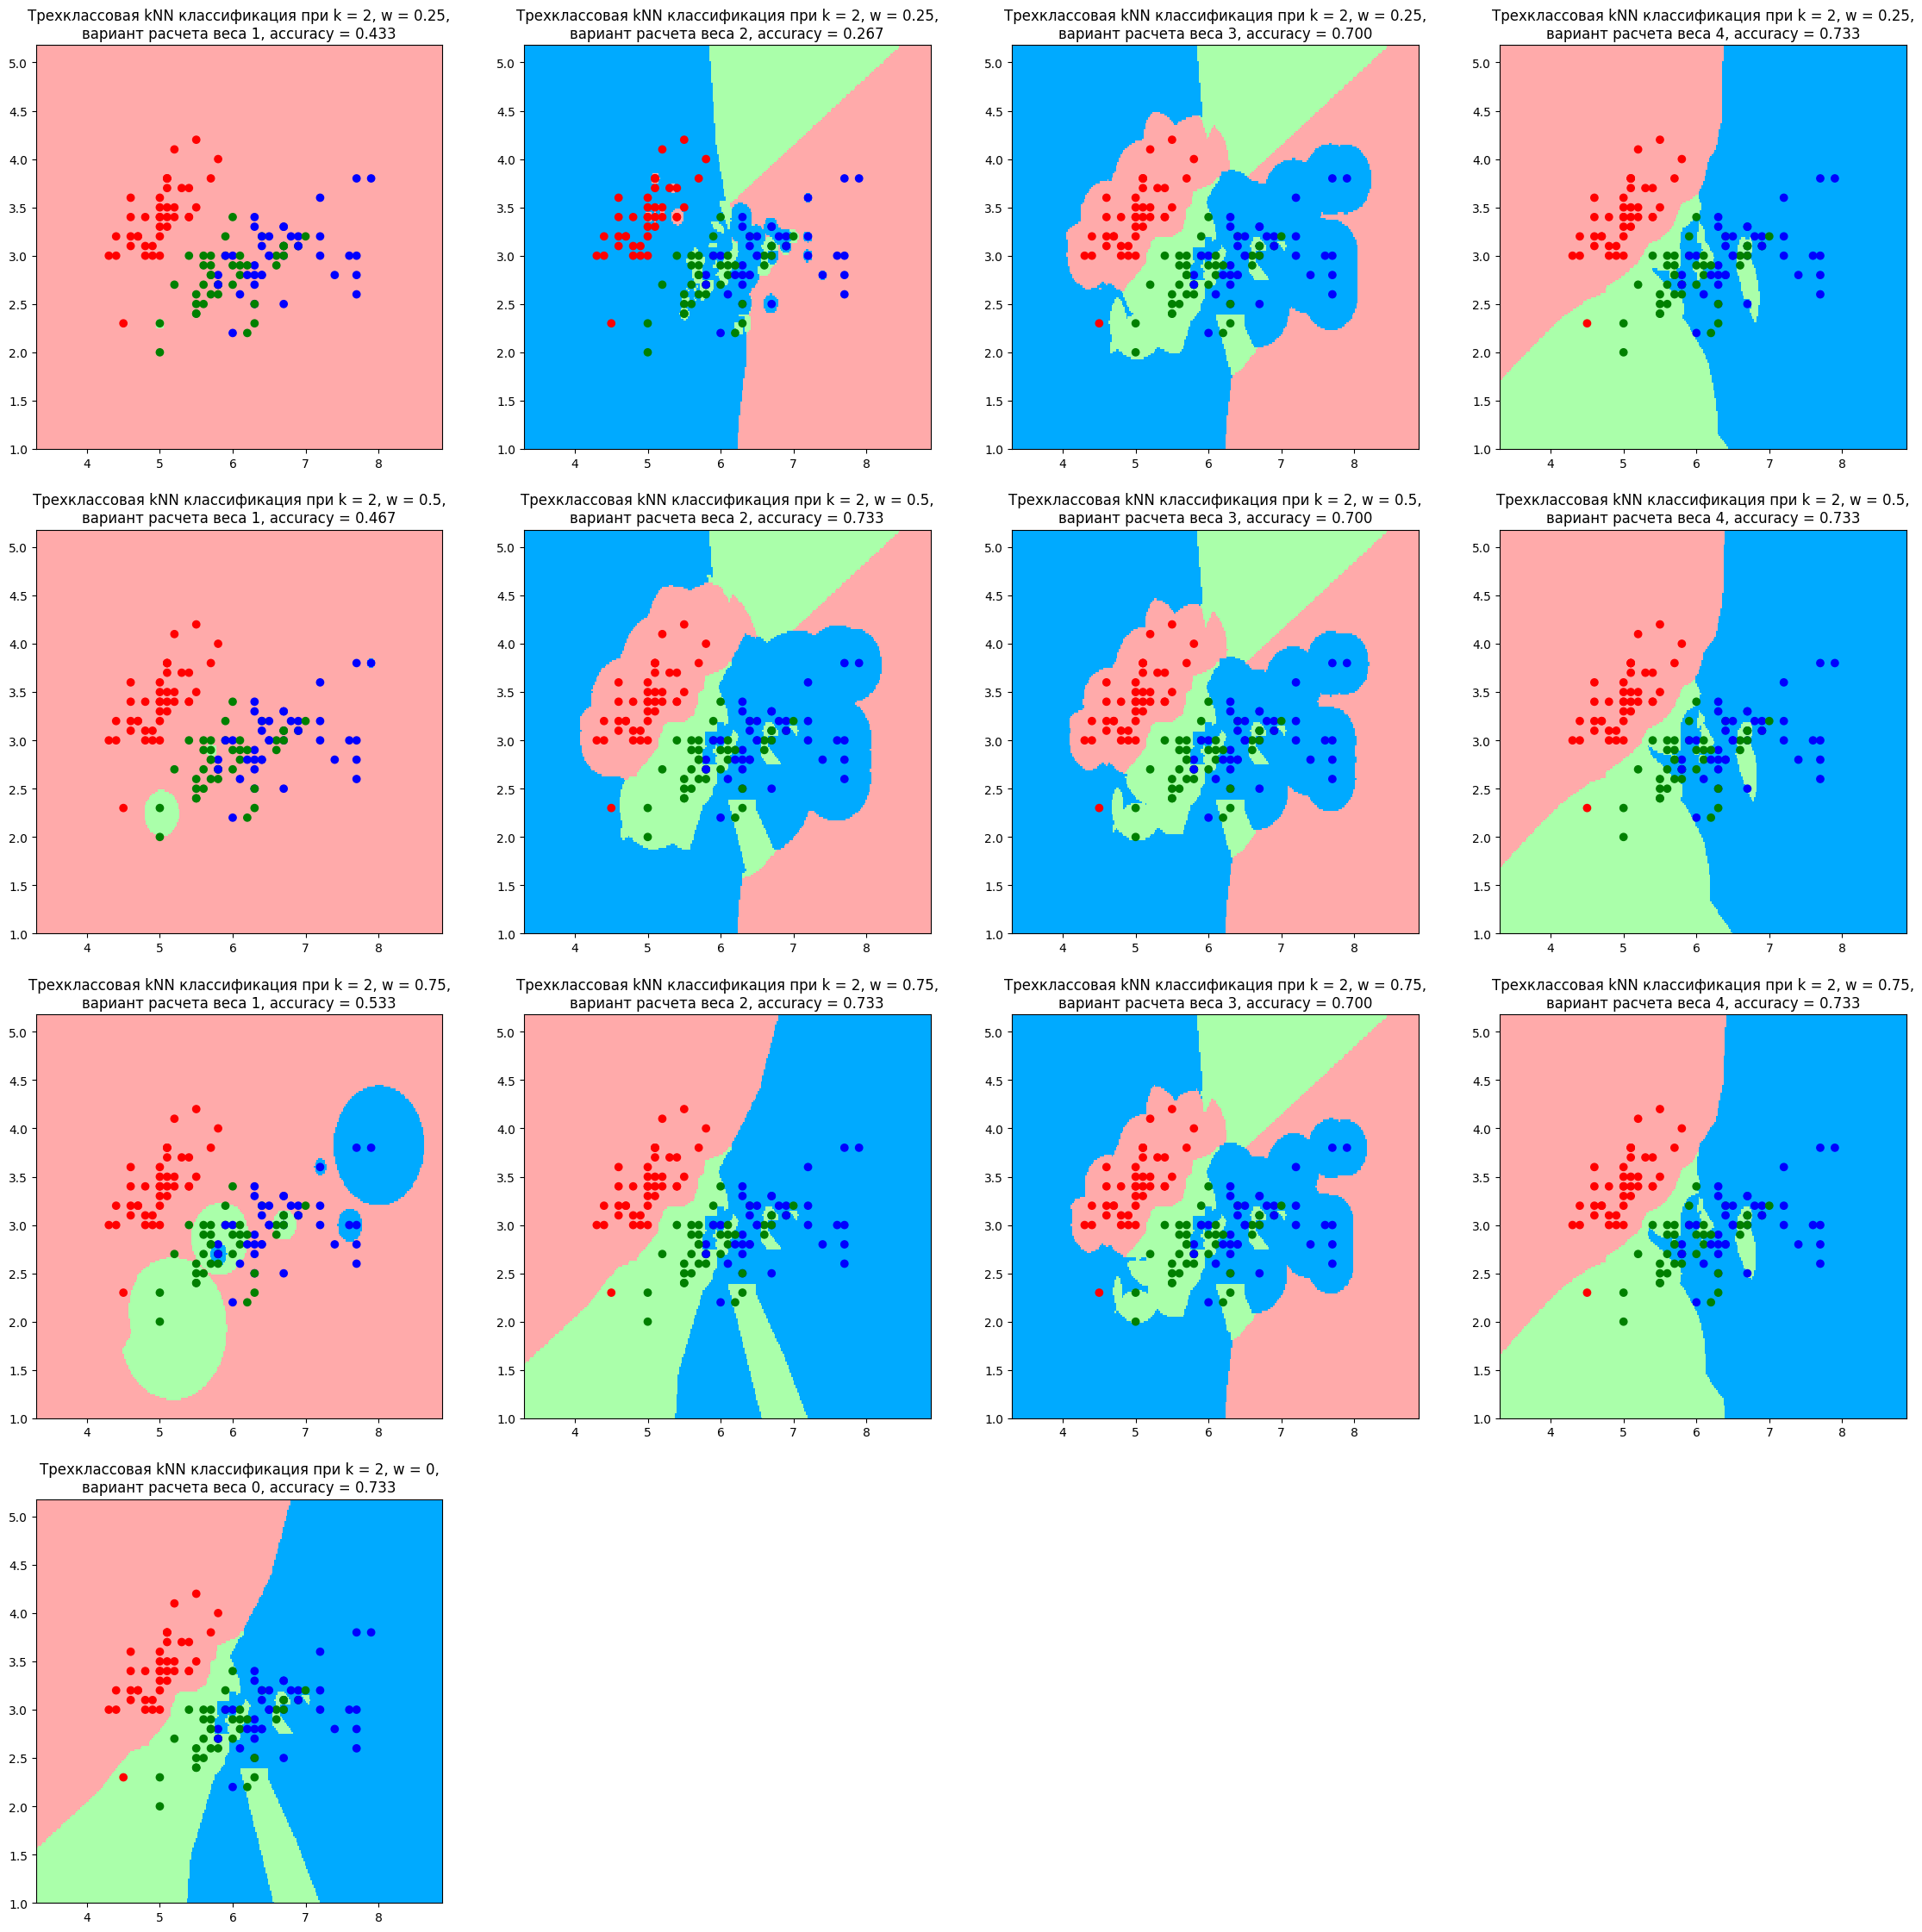

In [17]:
h = .02

# Расчет пределов графика
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

plt.figure(figsize = (28, 28))

count = 0

k = 2

for q in [0.25, 0.5, 0.75]:
    for weights_version in [1, 2, 3, 4]:
    
        count += 1

        predict = knn(X_train, y_train, X_test, k, q, weights_version)
        accur = accuracy(predict, y_test)
        
    
        # предсказания для всех точек
        Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, q, weights_version)

        #  график
        Z = np.array(Z).reshape(xx.shape)

        plt.subplot(4,4,count)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Добавляю на график обучающую выборку
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title(f"Трехклассовая kNN классификация при k = {k}, w = {q},\nвариант расчета веса {weights_version}, accuracy = {accur:.3f}")

count += 1

predict = knn(X_train, y_train, X_test, k, 0, 0)
accur = accuracy(predict, y_test)


# предсказания для всех точек
Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, 0, 0)

# график
Z = np.array(Z).reshape(xx.shape)

plt.subplot(4,4,count)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Добавляю на график обучающую выборку
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"Трехклассовая kNN классификация при k = {k}, w = {0},\nвариант расчета веса {0}, accuracy = {accur:.3f}")

plt.show()